# WITH PANDAS AND MATPLOTLIB

In [41]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

In [42]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [43]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [44]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [45]:
kill_gender = kill.gender.value_counts()

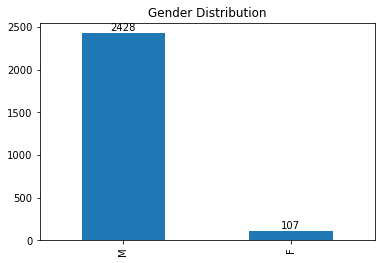

In [46]:
# My code
# with pandas

ax= kill_gender.plot(kind="bar", title="Gender Distribution")

ax.bar_label(ax.containers[0], padding=0.2);


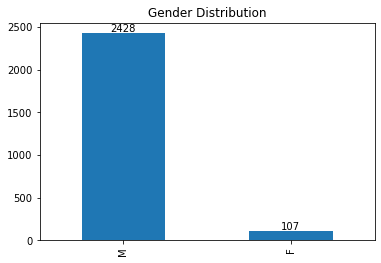

In [18]:
#My Code
# with matplotlib
# 1st solution

fig, ax = plt.subplots()

ax = kill_gender.plot(kind="bar")
ax.set_title("Gender Distribution")
ax.bar_label(ax.containers[0], label_type="edge");

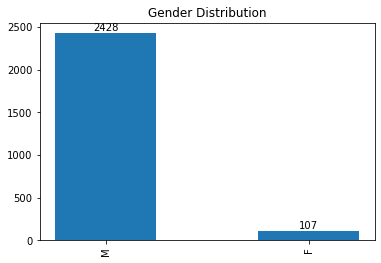

In [19]:
# My code
# 2nd solution

fig, ax = plt.subplots()

cont= ax.bar(kill_gender.index, kill_gender.values, width=0.5)
ax.set_title("Gender Distribution")
ax.bar_label(cont, padding=0.2)
ax.set_xticklabels(kill_gender.index, rotation=90);

## 2: Plot 7 most common kill weapons

In [37]:
# My Code

common_weapons = common_weapons.sort_index().sort_values(ascending=False)[:7]
common_weapons

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

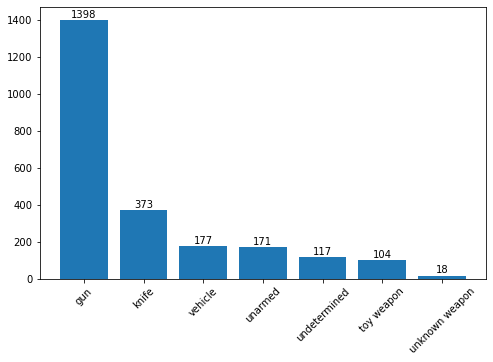

In [40]:
# My Code
# with matplotlib

fig, ax = plt.subplots(figsize=(8,5))
cont = ax.bar(common_weapons.index, common_weapons.values)
ax.bar_label(cont, padding=0.2)
ax.set_xticklabels(common_weapons.index, rotation=45);

## 3: Plot number of age of killed people under three groups : Under 25 and Above 25, others

In [47]:
# My Code

kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [48]:
# My Code

def age_cat(age):
    if age < 25 :
        return "below25"
    elif age >= 25 :
        return "above25"
    else:
        return "others"

In [49]:
# My Code

kill["age_cat"] = kill.age.apply(age_cat)

In [51]:
# My Code

age_class=kill["age_cat"].value_counts()
age_class

above25    2008
below25     450
others       77
Name: age_cat, dtype: int64

In [ ]:
# My Code
# with matplotlib

fig, ax = plt.subplots()
cont= ax.bar(age_class.index, age_class.values)
ax.bar_label(cont, padding=0.2);

## 4: Plot number of killed poeple by race

In [53]:
race_freq = kill.race.value_counts()
race_freq

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

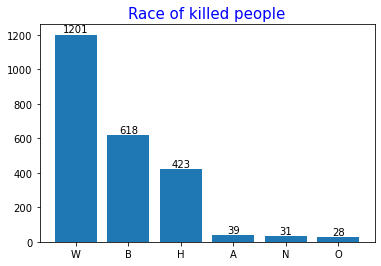

In [59]:
# with matplotlib

fig, ax = plt.subplots()
cont = ax.bar(race_freq.index, race_freq.values)
ax.bar_label(cont, padding=0.2)
ax.set_title("Race of killed people", {"fontsize":15, "color": "b"});

## 5: Killed People According to Races (Pie Chart)

In [60]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [61]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [62]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [63]:
kill.dropna(inplace=True)

In [64]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [65]:
kill.race.value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [66]:
labels=kill.race.value_counts().index
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [67]:
sizes=kill.race.value_counts().values
sizes

array([1168,  592,  401,   36,   29,   28], dtype=int64)

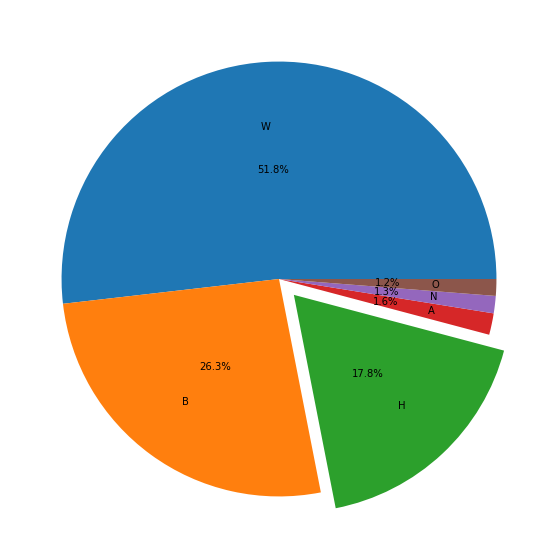

In [68]:
explode_list = [0,0,0.1,0,0,0]

plt.figure(figsize=(15, 10))
plt.pie(sizes,
        labels = labels,
        labeldistance=0.7,
        autopct="%.1f%%",
        pctdistance=0.5,
        explode=explode_list)

plt.show();